# Titanic surivied Machine Learning

## Import lib

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import math
from sklearn.preprocessing import LabelEncoder
import preprocessing

## Analysis the Train Set

In [3]:
train=pd.read_csv("../dataset/train.csv")
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [6]:
train.shape

(891, 12)

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin and Embarked have missing value.

<AxesSubplot:>

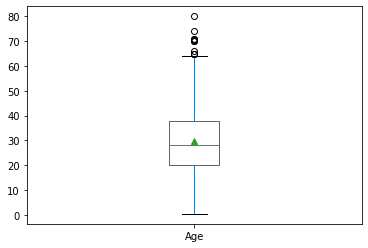

In [9]:
train['Age'].plot(kind='box', showmeans=True)

In [10]:
train.drop('Cabin', axis=1, inplace=True)

In [11]:
train['Age'].median()

28.0

In [12]:
train['Age']=train['Age'].fillna(28)

In [13]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [14]:
train['Embarked'].value_counts()
train['Embarked']=train['Embarked'].fillna("S")

In [15]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
cat_cols=['Sex','Embarked']
l = LabelEncoder()
for i in cat_cols:
    train[i]=l.fit_transform(train[i])
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,0


In [17]:
num_factors=['PassengerId','Pclass','Survived','Age','SibSp','Parch','Fare']
train[num_factors]

,PassengerId,Pclass,Survived,Age,SibSp,Parch,Fare
0,1,3,0,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,3,1,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,2,0,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,3,0,28.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


array([[<AxesSubplot:xlabel='PassengerId', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Pclass', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Survived', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Age', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='SibSp', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Parch', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Fare', ylabel='PassengerId'>],
       [<AxesSubplot:xlabel='PassengerId', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Survived', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Age', ylabel='Pclass'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Parch', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Fare', ylabel='Pclass'>],
       [<AxesSubplot:xlabel='PassengerId', ylabel='Survived'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot:xlabel='Survived', ylabel='Survived'>

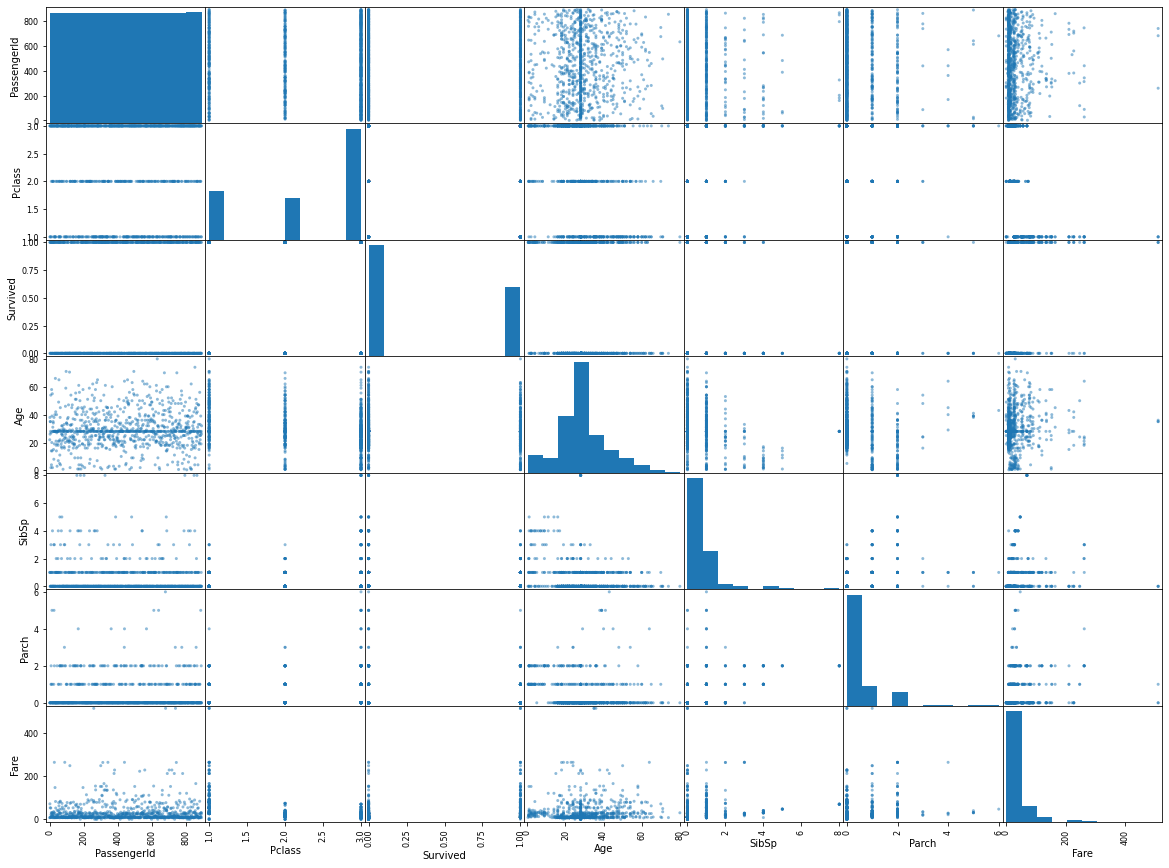

In [18]:
from pandas.plotting import scatter_matrix
scatter_matrix(train[num_factors], figsize=(20,15))

In [19]:
train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.034212,-0.057527,-0.001652,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.162098
Sex,0.042939,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.108262
Age,0.034212,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.018754
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.039798
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.224719
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.018754,0.068230,0.039798,-0.224719,1.000000


In [20]:
train.corr()['Survived'].sort_values()

Sex           -0.543351
Pclass        -0.338481
Embarked      -0.167675
Age           -0.064910
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

In [21]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [23]:
train.groupby("Sex").count()['Survived']

Sex
0    314
1    577
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

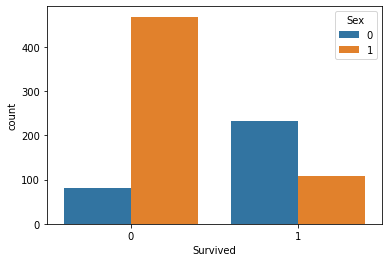

In [24]:
sns.countplot(x='Survived', hue='Sex', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

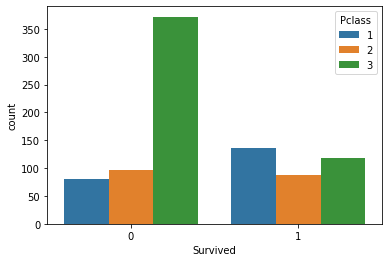

In [25]:
sns.countplot(x='Survived', hue='Pclass', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

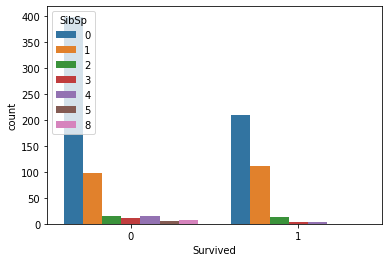

In [26]:
sns.countplot(x='Survived', hue='SibSp', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

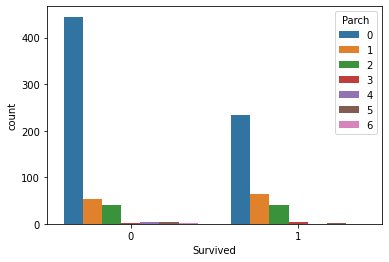

In [27]:
sns.countplot(x='Survived', hue='Parch', data=train)

0.0
512.3292
32.204207968574636
AxesSubplot(0.125,0.125;0.775x0.755)


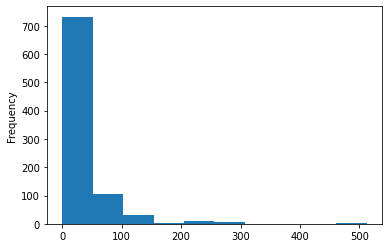

In [28]:
print(train['Fare'].min())
print(train['Fare'].max())
print(train['Fare'].mean())


print(train['Fare'].plot.hist())

In [29]:
train.loc[train['Fare']>500,'Pclass']

258    1
679    1
737    1
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

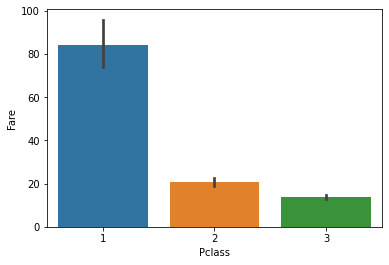

In [30]:
sns.barplot(x='Pclass', y='Fare', data=train)

In [31]:
x=['PassengerId','Sex','Age','SibSp','Parch','Fare']
x_train=train[x]
print(x_train)
y_train=train['Survived']
print(y_train)

     PassengerId  Sex   Age  SibSp  Parch     Fare
0              1    1  22.0      1      0   7.2500
1              2    0  38.0      1      0  71.2833
2              3    0  26.0      0      0   7.9250
3              4    0  35.0      1      0  53.1000
4              5    1  35.0      0      0   8.0500
..           ...  ...   ...    ...    ...      ...
886          887    1  27.0      0      0  13.0000
887          888    0  19.0      0      0  30.0000
888          889    0  28.0      1      2  23.4500
889          890    1  26.0      0      0  30.0000
890          891    1  32.0      0      0   7.7500

[891 rows x 6 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


## Training

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [33]:
# Logistic Regression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [50]:
# Decision Tree
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [60]:
# RandomForest
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

## Testing

In [61]:
test=pd.read_csv("../dataset/test.csv")
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [62]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

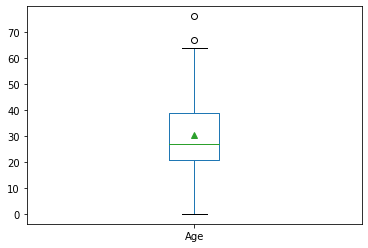

In [63]:
test['Age'].plot(kind='box', showmeans=True)

In [64]:
test['Age']=test['Age'].fillna(test['Age'].median())
test.drop("Cabin", axis=1,inplace=True)
test['Fare']=test['Fare'].fillna(test['Fare'].median())

In [65]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [66]:
test['Sex']=pd.get_dummies(test['Sex'], drop_first=True)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S


In [67]:
x2=['PassengerId','Sex','Age','SibSp','Parch','Fare']
x_test=test[x2]
predict_y=model.predict(x_test)
predict_y

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [68]:
Submission = pd.DataFrame({ 'PassengerId': test['PassengerId'],
                            'Survived': predict_y })
Submission.to_csv("../output/Submission.csv", index=False)

In [69]:
Submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
